<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:

The input layer recieves the data. It is classified as 'visible' because it is the only layer that interacts directly with the input data. The input layer interacts with a subsequent hidden layer (if one exists). Input layers are typically represented with one cell for each feature/class of the input data, and weights applied to this layer directly effect only that feature.

### Hidden Layer:

A hidden layer is accessed through the input layer. They are 'inside' the network, and do not directly interact with the data.

### Output Layer:

The output layer returns values or whatever other information is needed for the application of the network. Generally, the output will be in the format of a vector or list of values. There will usually be a 'cell' or 'node' for each output class. If the network is used for a regression or classification problem with only one class, there will be one output node.

### Neuron:

An artificial neuron takes a group of inputs, multiplies them by their weights, adds the results and any bias and applies an activation function to determine the output. In some sense it is a decision function that takes multiple inputs and uses them to produce an output.
In short, it uses a weighted sum of all inputs to determine the output.

### Weight:

A weight is how a given input should relate to an output. Positive or negative correlation, and how much a change in that input should change the output.

### Activation Function:

The activation function is the part of the artificial neuron that ~decides~ what the output of the neuron should be. In the case of using a sigmoid activation function, any extreme values will be pushed close to 1 or 0 and the output will be correspondingly "on" or "off", or if the input follows a normal distribution, the output should be close to linear. A linear activation function will make the output of the artificial neuron directly related to the input.

### Node Map:

A node map shows the structure of a whole neural network.

### Perceptron:

A perceptron is a neural network composed of a single neuron with all parameters directly exposed.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
import numpy as np

In [151]:
nand_matrix = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1],
])

ground_truth = [[1],[1],[1],[0]]

In [73]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

def sigmoid_ddx(x):
    sx = sigmoid(x)
    return(sx * (1-sx))

In [262]:
weights = (2 * np.random.random((2,1)) - 1)
weighted_sum = np.dot(nand_matrix, weights)
activated_output = sigmoid(weighted_sum)
error = (ground_truth - activated_output)
adjustments = error * sigmoid_ddx(activated_output)
weights += np.dot(nand_matrix.T, adjustments)
print(weights)
print(weighted_sum)
print(activated_output)

[[ 0.01787578]
 [-1.02296743]]
[[ 0.        ]
 [ 0.4766769 ]
 [-0.63560905]
 [-0.15893215]
 [-0.15893215]
 [-0.15893215]
 [-0.15893215]
 [-0.15893215]]
[[0.5       ]
 [0.61696287]
 [0.34623979]
 [0.46035039]
 [0.46035039]
 [0.46035039]
 [0.46035039]
 [0.46035039]]


In [221]:
weighted_sum = np.dot(nand_matrix, weights) - 1.5
activated_output = sigmoid(weighted_sum)
error = ground_truth - activated_output
adjustments = error * sigmoid_ddx(activated_output)
weights += np.dot(nand_matrix.T, adjustments)
print(weights)
print(activated_output)

[[-0.06997848]
 [-0.0509341 ]]
[[0.18242552]
 [0.17214154]
 [0.17498149]
 [0.16503245]
 [0.16503245]
 [0.16503245]
 [0.16503245]
 [0.16503245]]


In [263]:
for i in range(10000):
    weighted_sum = np.dot(nand_matrix, weights) - 1.5
    
    activated_output = sigmoid(weighted_sum)
    
    error = ground_truth - activated_output
    
    adjustments = error * sigmoid_ddx(activated_output)
    
    weights += np.dot(nand_matrix.T, adjustments)
    
print("Weights after training")
print(weights)

print("\nOutput after training")
print(activated_output)

Weights after training
[[-0.06017196]
 [-0.06017196]]

Output after training
[[0.18242552]
 [0.17362197]
 [0.17362197]
 [0.16515744]
 [0.16515744]
 [0.16515744]
 [0.16515744]
 [0.16515744]]


In [247]:
class Perceptron(object):
    
    def __init__(self, rate = 0.1, itr = 10):
        self.rate = rate
        self.itr = itr
        
    def fit(self, X, y):

        self.weight = np.zeros(1 + X.shape[1])
        self.errors = []
        for i in range(self.itr):
            err = 0
            for x_i, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(x_i))
                self.weight[1:] += delta_w * x_i
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return(self)
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        return(np.where(self.net_input(X) >= 0.0, 1, -1))
    

In [265]:
#**Perceptron NAND gate**#

def NAND_perceptron(x1, x2):
    weights = np.array([-1, -1])
    bias = 1.5
    y = ((weights[0] * x1) + (weights[1] * x2) + bias)
    #simulated activation function
    if y <= 0 :
        return 0
    else:
        return 1

In [267]:
predict_nand = []
for row in nand_matrix:
    predict_nand.append([NAND_perceptron(row[0], row[1])])

print(predict_nand)
print(ground_truth)

[[1], [1], [1], [0], [0], [0], [0], [0]]
[[1], [1], [1], [0], [0], [0], [0], [0]]


In [154]:
p = Perceptron(0.5, 1000)
p.fit(nand_matrix, ground_truth)
p.predict(more_numbers)

array([1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
import matplotlib.pyplot as plt

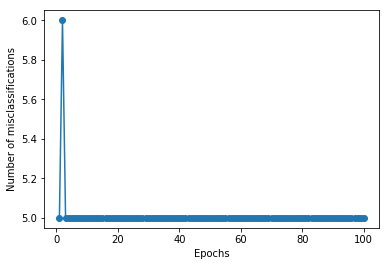

In [155]:
pn = Perceptron(0.5, 100)
pn.fit(nand_matrix, ground_truth)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [226]:
import pandas as pd
titanic = pd.read_csv('./titanic.csv')
titanic.shape

(891, 16)

In [227]:
titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [228]:
titanic.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [250]:
titanic.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [245]:
titanic.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [257]:
for col in titanic_dropna.columns:
    titanic_dropna[col] = titanic_dropna[col].astype(np.float64)

In [258]:
titanic_dropna.dtypes

survived    float64
pclass      float64
age         float64
sibsp       float64
parch       float64
fare        float64
dtype: object

In [240]:
from sklearn.model_selection import train_test_split

In [256]:
titanic_dropna = titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].dropna(axis=0)
tiXtrain, tiXtest, tiytrain, tiytest = train_test_split(
                titanic_dropna[
                    ['pclass', 'age', 'sibsp', 'parch', 'fare']],
                titanic_dropna['survived'],
                test_size=0.2, random_state=42
)

In [260]:
tiXtrain.shape, tiXtest.shape, tiytrain.shape, tiytest.shape

((571, 5), (143, 5), (571,), (143,))

In [259]:
p = Perceptron(0.5, 1000)
p.fit(tiXtrain, tiytrain)
pred_t = p.predict(tiXtest)

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?